# TP 1: régression linéaire
***

Tout d'abord nous chargons le modules Python nécessaires à ce TP.

In [38]:
# Enable matplot graphics
%matplotlib notebook

# import needed module
import numpy as np    
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import linear_model

# Set some plot parameters
mpl.rcParams['lines.markersize'] = 4

1 - Récupérer les données du fichier [`Galton.txt`](https://bitbucket.org/portierf/shared_files/downloads/Galton.txt) (voir aussi leur description [ici](http://www.randomservices.org/random/data/Galton.html)) et charger les avec Pandas.

In [2]:
# load data in a pandas DataFrame
df = pd.read_csv("Galton.txt", sep='\t')

# Display the first rows
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


Nous pouvons afficher quelques données afin d'avoir une idée de leur structure et de détecter d'eventuelles anomalies.

<IPython.core.display.Javascript object>


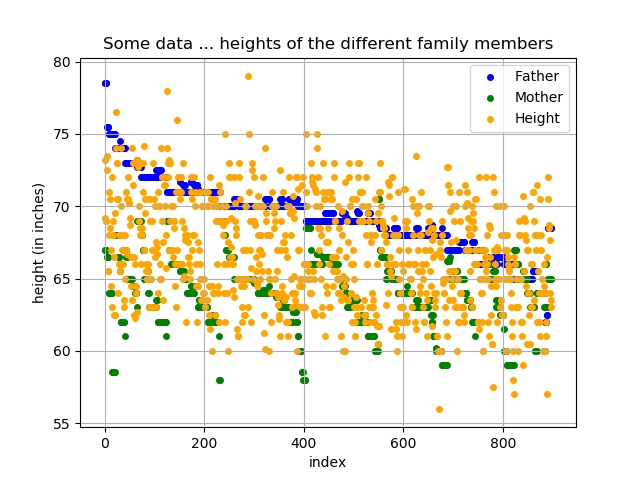

In [11]:
# Create a new figure
fig = plt.figure()
plt.grid(True)

plt.title("Some data ... heights of the different family members")
plt.xlabel("index")
plt.ylabel("height (in inches)")

# scatter plot
plt.scatter(df.index, df['Father'], label='Father', color='blue')
plt.scatter(df.index, df['Mother'], label='Mother', color='green')
plt.scatter(df.index, df['Height'], label='Height', color='orange')

plt.legend(loc='upper right');

plt.show()

2 - Créer une colonne supplémentaire appelée `"MeanParents"`qui contient la taille du parent *“moyen”*, 
c’est-à-dire $\frac{1}{2} (\mbox{taille}(\mbox{pere}) + 1.08 * \mbox{taille}(\mbox{mere}))$. 
Pour plus d’explication sur cette transformation, on pourra consulter :
[https://17art.ru/fr/calculator-of-the-ratio-of-height-and-weight-of-the-child-calculate-the-final-growth-of-the-child]()

On note $x_i$ la taille du parent moyen pour la famille $i$ et $y_i$ la taille de l’enfant.
On écrit $y_i =  \theta_1 x_i + \theta_0 + \varepsilon_i$ et on modélise les variables $\varepsilon_i$ comme centrées, indépendantes de même variance $\sigma^2$ inconnue.

In [4]:
# Create the new data column "MeanParents" 
df["MeanParents"] = 0.5 * (df["Father"] + 1.08 * df["Mother"])

# Display the first rows
df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


On peut visualiser les données de la colonne supplémentaire que nous avons créé en fonction de son index.

<IPython.core.display.Javascript object>


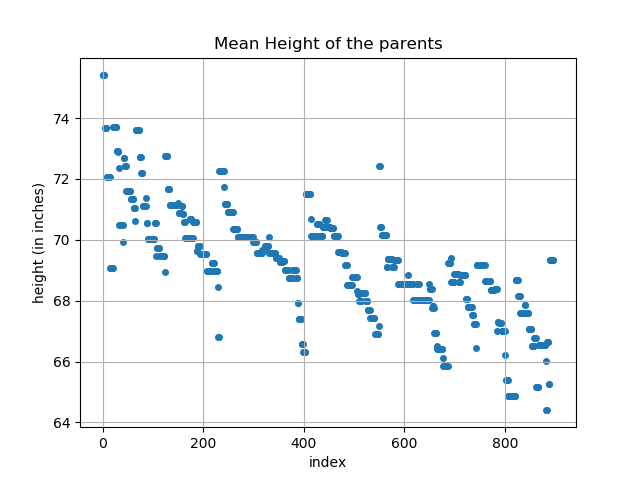

In [13]:
# create a new figure
fig = plt.figure()
plt.grid(True)

plt.title("Mean Height of the parents")
plt.xlabel("index")
plt.ylabel("height (in inches)")

# scatter plot
plt.scatter(df.index, df['MeanParents'])

plt.show()

3 - Tracer le nuage de points $(xi; yi)$ pour $1 \le i \le n$ où $n$ est le nombre d’observations figurant dans les données.

Les donnéees contiennent (n=) 898 lignes.


<IPython.core.display.Javascript object>


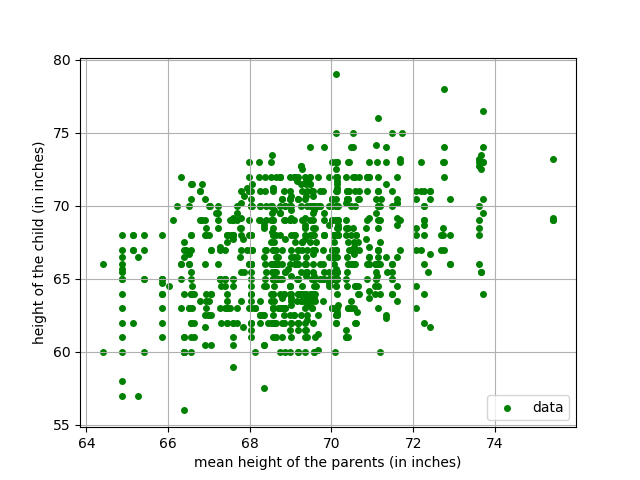

In [15]:
# Compute the number of rows (n)
print("Les donnéees contiennent (n=) {} lignes.".format(len(df)))

# Create a new figure
fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("mean height of the parents (in inches)")
plt.ylabel("height of the child (in inches)")

# scatter plot
plt.scatter(df['MeanParents'], df['Height'], label='data', color='green')

plt.legend(loc='lower right')

plt.show()

4 - Estimer $\theta_0$, $\theta_1$ par $\hat{\theta}_0$ , $\hat{\theta}_1$ en utilisant la fonction  `LinearRegression` de `sklearn`.
Calculer et visualiser les valeurs prédites $\hat{y}_i = \theta_1 x_i + \theta_0$ et $y_i$ sur un même graphique.

In [7]:
# Build X matrix et y vector
# X (n_samples, n_features) and y (n_samples) must be np.ndarrays structures
X_raw = df["MeanParents"].values.reshape(-1, 1)
y_raw = df["Height"].values.reshape(-1, 1)

# create a new instance of the Ordinary least squares Linear Regression model
# By default, the intercept is included in the model
reg_raw = linear_model.LinearRegression()

# fit the linear model
reg_raw.fit(X_raw, y_raw)

print("The shape of matrix X is: {}".format(X_raw.shape))
print("The shape of vector y is: {}".format(y_raw.shape))

print("Slope = {:.3f}, Intercept = {:.3f}".format(reg_raw.coef_[0][0],
                                                  reg_raw.intercept_[0]))



The shape of matrix X is: (898, 1)
The shape of vector y is: (898, 1)
Slope = 0.641, Intercept = 22.376


<IPython.core.display.Javascript object>


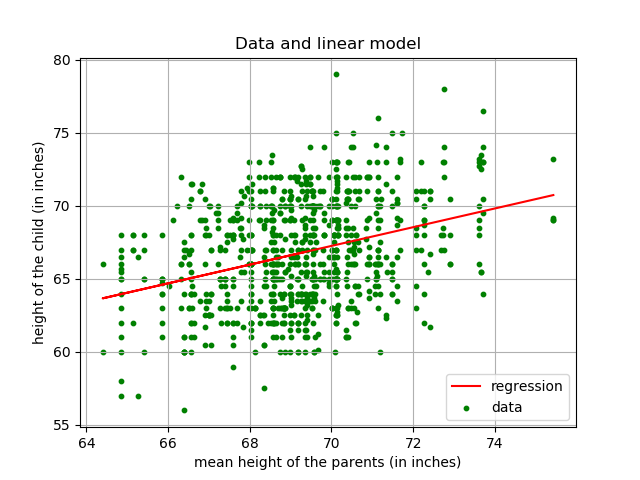

In [16]:
# Compute predicted values using the linear model
pred_raw = reg_raw.predict(X_raw)

# create a new figure
fig = plt.figure()
plt.grid(True)

plt.title("Data and linear model")

plt.xlabel("mean height of the parents (in inches)")
plt.ylabel("height of the child (in inches)")

# Plot scatters
plt.scatter(df['MeanParents'], df['Height'], label='data', color='green', s=10)

# plot linear model
plt.plot(X_raw, pred_raw, label='regression', color='red')

plt.legend(loc='lower right')

plt.show()

5 - Vérifier la formule vue en cours liée au recentrage des données. On centrera les données et on vérifiera que la prédiction effectuée dans le modèle centré est bien la même que celle effectuée précédemment. Justifiez votre réponse. On pourra définir $y_{i,c}$ et $x_{i,c}$ comme étant les variables centrées et calculer

<IPython.core.display.Javascript object>


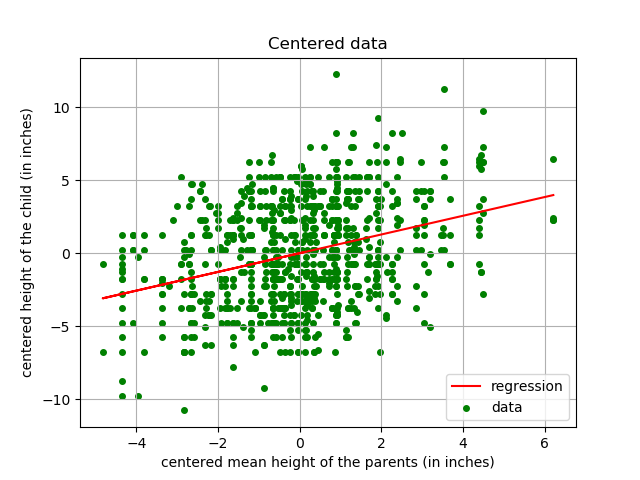

In [21]:
# compute the mean
X_mean = X_raw.mean()
y_mean = y_raw.mean()

# Centered the data
X_center = X_raw - X_mean
y_center = y_raw - y_mean

# create a new instance of the Ordinary least squares Linear Regression model
# Because we are using centered data, the intercept is excluded of the model
reg_center = linear_model.LinearRegression(fit_intercept=False)

# fit linear model
reg_center.fit(X_center, y_center)

# Compute predicted values using the linear model
pred_center = reg_center.predict(X_center)

# create figure
fig = plt.figure()
plt.grid(True)

plt.title("Centered data")
plt.xlabel("centered mean height of the parents (in inches)")
plt.ylabel("centered height of the child (in inches)")

# plot scatters
plt.scatter(X_center, y_center, label='data', color='green')

# plot linear model
plt.plot(X_center, pred_center, label='regression', color='red')

plt.legend(loc='lower right')

plt.show()

Centré:
$\tilde{Y} = \tilde{X} \tilde{\theta}$

$Y - \bar{Y} = (X - \bar{X} ) \tilde{\theta}$

$Y = (\bar{Y} - \bar{X} \tilde{\theta}) + X \tilde{\theta}$  vs. $Y = \theta_0 + X \theta_1$

In [10]:

theta_0 = reg.intercept_[0]
theta_1 = reg.coef_[0][0]

# centered mode
print(reg_c.intercept_, reg_c.coef_)

beta_1 = reg_c.coef_[0][0]
beta_0 = y_mean - X_mean * beta_1

print("intercept: {} => {}".format(theta_0, beta_0))
print("coef: {} => {}".format(theta_1, beta_1))    

y_pred_c = beta_1 * X + (y_mean - X_mean * beta_1)
y_pred  = theta_1 * X + theta_0

np.allclose(y_pred_c, y_pred)

NameError: name 'reg' is not defined

On constate que les coefficients sont identiques.
D'autre part on peut aussi verifier l'équivalent des predictions.

In [ ]:
y1 = X * beta

6 - Visualiser l’histogramme des résidus $r_i = y_i − \hat{y}_i$ ($\hat{y}_i$ est la valeur prédite par le modèle). L’hypothèse de normalité est-elle crédible ?

<IPython.core.display.Javascript object>


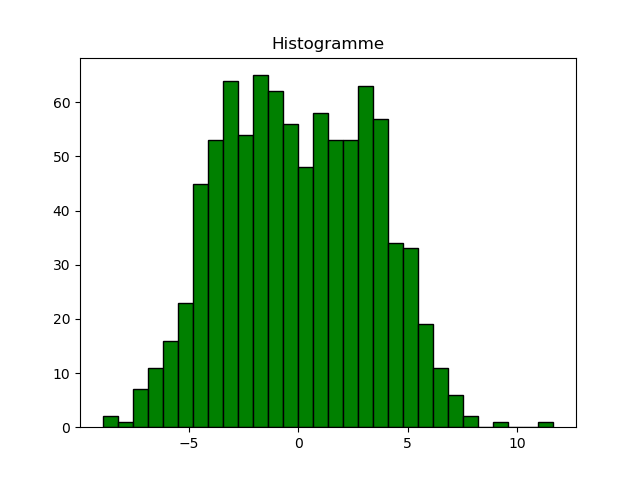

In [39]:
r_center = y_center - pred_center

fig = plt.figure()

plt.title("Histogramme")

plt.hist(r_center, bins=30, color='green', edgecolor='black')
plt.show()

Distribution bi-modale

7 - Sur un graphique similaire à celui de la question 3, sur lequel apparait le nuage de points et la droite de régression, distinguer (à l’aide de deux couleurs différentes) les filles des garçons. Expliquer la forme de la distribution des résidus observée à la question précédente.

<IPython.core.display.Javascript object>


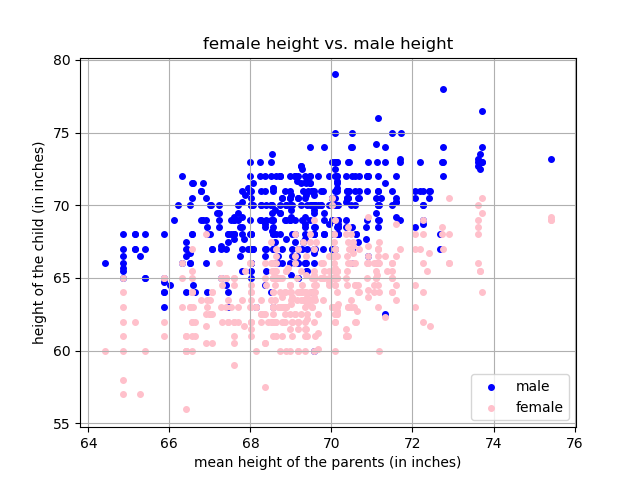

In [34]:
# create a dataframe for the boys (male)
# copy() is used to make a new copy of the dataframe
df_m = df[df["Gender"] == 'M'].copy()

# create a dataframe for the girls (female)
df_f = df[df["Gender"] == 'F'].copy()

df_m.head()

df_m["MeanParents"] = 0.5 * (df_m["Father"] + 1.08 * df_m["Mother"])
df_f["MeanParents"] = 0.5 * (df_f["Father"] + 1.08 * df_f["Mother"])

fig = plt.figure()
plt.grid(True)

plt.title("female height vs. male height")
plt.xlabel("mean height of the parents (in inches)")
plt.ylabel("height of the child (in inches)")

# plot scatters
plt.scatter(df_m['MeanParents'], df_m['Height'], label='male', color='blue')
plt.scatter(df_f['MeanParents'], df_f['Height'], label='female', color='pink')
#plt.plot(X, pred, label='regression', color='red')

plt.legend(loc='lower right')

plt.show()


On remarque que deux groupes distincts, les garcons et les filles. 
On peut voir que le groupe des garcons est en moyenne plus grand que le groupe des filles 
quelque soit la taille moyenne des parents.
Cela explique la structure bi-modale de l'histogramme, 
et suggère de faire deux modèles differents, un pour les filles et un pour les garcons.

8 - Effectuer une régression sur le groupe des garçons uniquement. Représenter cette droite de régression sur le graphique de la question précédente. Représenter la distribution des résidus obtenue sur ce modèle. Commenter.

In [ ]:

X_g = df_g["MeanParents"].values.reshape(-1, 1)
y_g = df_g["Height"].values.reshape(-1, 1)

reg_g = linear_model.LinearRegression().fit(X_g, y_g)

print("{}".format(reg.coef_))
print("{}".format(reg.intercept_))

pred_g = reg_g.predict(X_g)

fig = plt.figure()
plt.grid(True)

plt.title("")
plt.xlabel("MeanParents (centre)")
plt.ylabel("Height (centre)")



plt.scatter(df_g['MeanParents'], df_g['Height'], label='garcon', color='green')
plt.scatter(df_f['MeanParents'], df_f['Height'], label='fille', color='orange')
plt.plot(X_g, pred_g, label='regression', color='red')

plt.legend(loc='upper right')

plt.show()

In [ ]:
r_g = y_g - pred_g

fig = plt.figure()

plt.title("Histogramme")

plt.hist(r_g, bins=30)
plt.show()

9 - A l’aide d’un partitionnement aléatoire de l’échantillon, construire un échantillon de test et un échantillon d’apprentissage.
L’échantillon test doit contenir 20% des données.
On estimera, sur l’échantillon d’apprentissage deux modèles : un premier modèle basé uniquement sur les garçons, et un deuxième modèle basé sur l’échantillon complet.
On comparera les deux prédicteurs sur le groupe “garçon” de l’échantillon test en calculant le risque de prédiction :

\begin{equation}
\frac{1}{|\mbox{test|}} (y_i − \hat{y}_i )^2 ,
\end{equation}

$\hat{y}$ est la valeur prédite par le modèle.


10 - Construire à la main un prédicteur qui combine le prédicteur linéaire appris sur les filles
avec celui appris sur les garçons.

11 - En utilisant, un encodage booléen de la variable GENDER construire le même prédicteur
que précédement. Calculer, "à la main", son coefficient de determination. On comparera ce
dernier au coefficient de determination du modèle avec seulement la variable MeanParents.

12 - Faire une régression avec les 2 variables explicatives suivantes : la taille du père et de la mère. Faire un graphique (en 3 dimensions) qui représente le nuage de point et le plan de
régression. Visualiser la distribution des résidus.

13 - A l’aide d’un échantillon test (construit comme précédemment), comparer la performance
du modèle précédent à celle du modèle contenant seulement la variable MeanParents. Commenter.